In [1]:
import pandas as pd 


data = pd.read_csv('../dataset/dados_pregao_dotz3.csv')
data = data.rename(columns={'data_pregao': 'ds', 'preco_ultimo_negocio': 'y'})
colunas = ['ds', 'y']
data = data[colunas]
data['ds'] = pd.to_datetime(data['ds'])

data

,ds,y
0,2021-05-31,13.20
1,2021-06-01,13.18
2,2021-06-02,13.32
3,2021-06-04,13.14
4,2021-06-07,13.15
...,...,...
835,2024-10-01,4.80
836,2024-10-02,4.81
837,2024-10-03,4.89
838,2024-10-04,5.50


In [2]:
from prophet import Prophet

model = Prophet()
model.fit(data)

c:\Users\suporte\Documents\Workspace\pregao_forecasting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
10:44:28 - cmdstanpy - INFO - Chain [1] start processing
10:44:28 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
future = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future)

c:\Users\suporte\Documents\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\suporte\Documents\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\suporte\Documents\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

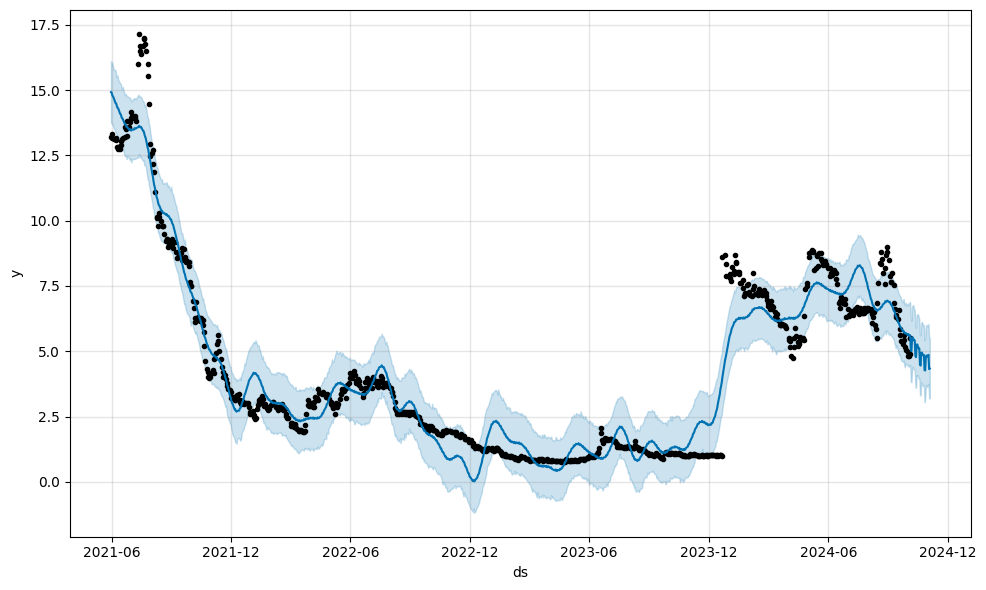

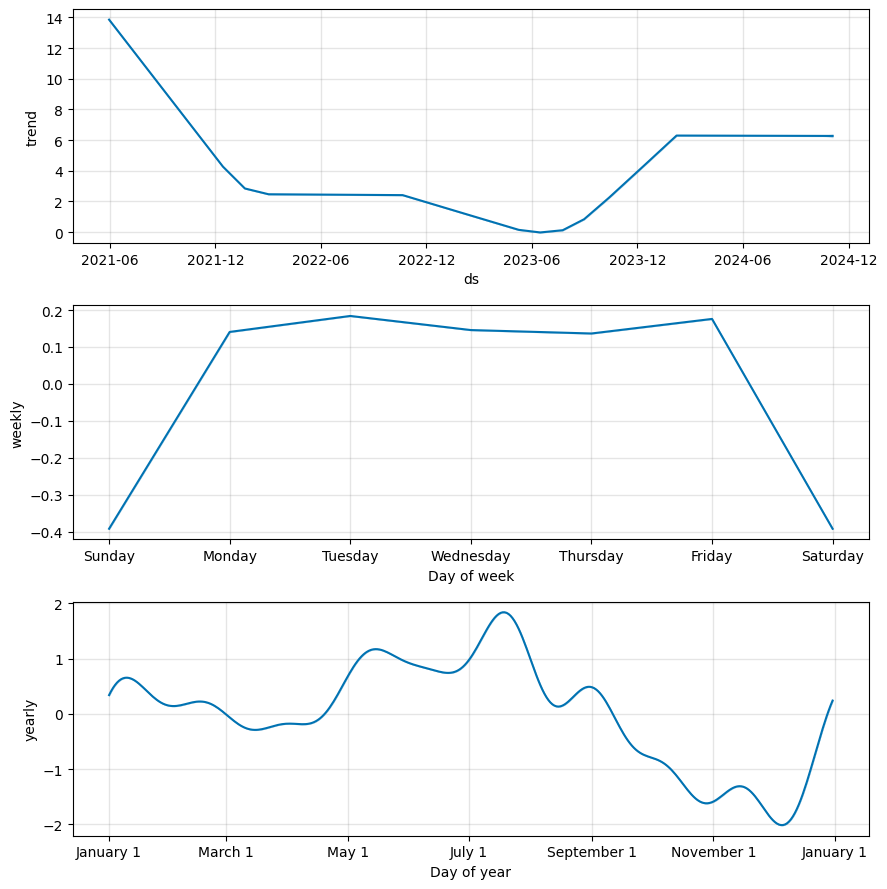

In [4]:
from prophet.plot import plot, plot_components
from matplotlib import pyplot as plt

model.plot(forecast)
model.plot_components(forecast)
plt.show()

In [5]:
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

df_metrics = performance_metrics(df_cv)

mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Square Error: {mse:.2f}')
print(f'Root Mean Square Error: {rmse:.2f}')

  0%|          | 0/1 [00:00<?, ?it/s]10:44:34 - cmdstanpy - INFO - Chain [1] start processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


Mean Absolute Error: 5.74
Mean Square Error: 40.13
Root Mean Square Error: 6.33


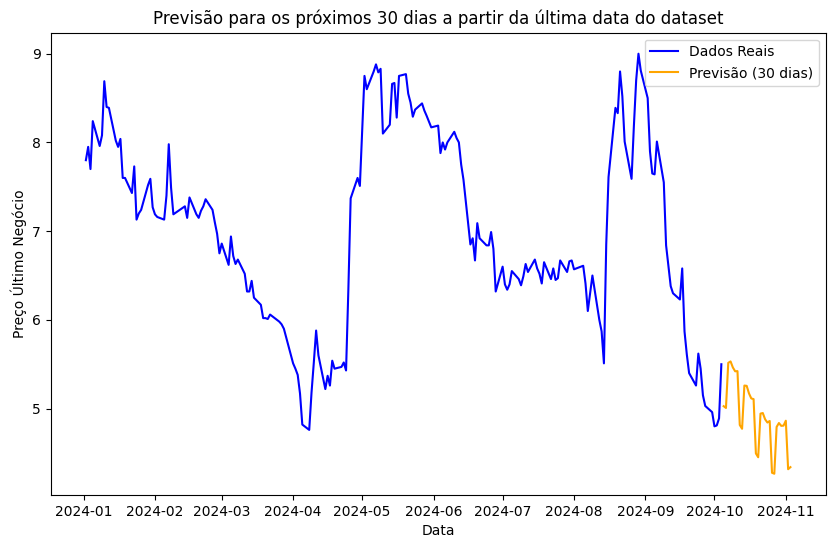

In [12]:
#Filtrar os dados e previsões a partir de 2024
data_filtered = data[data['ds'] >= '2024-01-02']

# Plotar os dados reais e as previsões
plt.figure(figsize=(10, 6))

# Plotar o dataset original (dados históricos)
plt.plot(data_filtered['ds'], data_filtered['y'], label='Dados Reais', color='blue')

# Plotar a previsão (somente os 30 dias futuros)
future_forecast = forecast[forecast['ds'] > data['ds'].max()]  # Filtrar os próximos 30 dias
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Previsão (30 dias)', color='orange')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço Último Negócio')
plt.title('Previsão para os próximos 30 dias a partir da última data do dataset')
plt.legend()

# Exibir o gráfico
plt.show()